In [54]:
#Step 1: Import modules

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
# Step 2: Import database
dataset = pd.read_csv('ex2data1.txt', header = None, names = ['exam score 1', 'exam score 2', 'result'])
dataset.head()

,exam score 1,exam score 2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
x = dataset['exam score 1']
y = dataset['exam score 2']
pos = dataset['result'] == 1
neg = dataset['result'] == 0


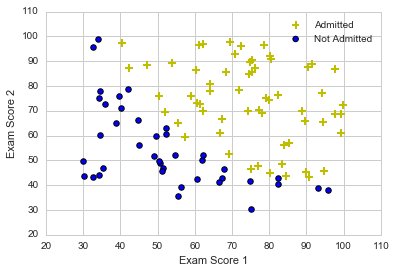

In [55]:
# Step 3: Visualize Data
a = plt.scatter(dataset[pos]['exam score 1'],dataset[pos]['exam score 2'], marker = '+', c = 'y', linewidth = 2, s=60, label='Admitted')
b = plt.scatter(dataset[neg]['exam score 1'],dataset[neg]['exam score 2'], c = 'b', linewidth = 1, s=30, label = 'Not Admitted')
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
plt.legend()

In [5]:
dataset[pos].head()

,exam score 1,exam score 2,result
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [6]:
# Step 4: manipulate data for use. 
X = dataset.drop(['result'], axis=1)
Y = dataset['result']

X = X.values # 100 x 2 array
Y = Y.values # 1 x 100 array

In [42]:
# Step 5: Fit with Scikit-learn Logistic Regression
regr = LogisticRegression()
regr.fit(X,Y) #magic
regr.score(X,Y)

0.87

In [69]:
print regr.coef_, regr.intercept_

[[ 0.03844482  0.03101855]] [-3.89977794]


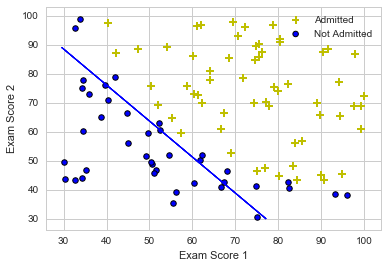

In [31]:
# Step 6: Visualize with 'fit' line
a = plt.scatter(dataset[pos]['exam score 1'],dataset[pos]['exam score 2'], marker = '+', c = 'y', linewidth = 2, s=60, label='Admitted')
b = plt.scatter(dataset[neg]['exam score 1'],dataset[neg]['exam score 2'], c = 'b', linewidth = 1, s=30, label = 'Not Admitted')
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
plt.legend()


#Try http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = regr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.contour(xx,yy,Z, linewidths=1, colors = 'b')

In [14]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx

array([[  29.55882245,   29.57882245,   29.59882245, ...,  100.27882245,
         100.29882245,  100.31882245],
       [  29.55882245,   29.57882245,   29.59882245, ...,  100.27882245,
         100.29882245,  100.31882245],
       [  29.55882245,   29.57882245,   29.59882245, ...,  100.27882245,
         100.29882245,  100.31882245],
       ..., 
       [  29.55882245,   29.57882245,   29.59882245, ...,  100.27882245,
         100.29882245,  100.31882245],
       [  29.55882245,   29.57882245,   29.59882245, ...,  100.27882245,
         100.29882245,  100.31882245],
       [  29.55882245,   29.57882245,   29.59882245, ...,  100.27882245,
         100.29882245,  100.31882245]])

In [21]:
#meshgrid example
array1 = np.array([1,2,3])
array2 = np.array([10, 20, 30])
arr1, arr2 = np.meshgrid(array1, array2)
arr3 = arr1 + arr2
print arr1
print arr2
print arr3


[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[10 10 10]
 [20 20 20]
 [30 30 30]]
[[11 12 13]
 [21 22 23]
 [31 32 33]]


In [23]:
gg = np.linspace(1,15)
gg

array([  1.        ,   1.28571429,   1.57142857,   1.85714286,
         2.14285714,   2.42857143,   2.71428571,   3.        ,
         3.28571429,   3.57142857,   3.85714286,   4.14285714,
         4.42857143,   4.71428571,   5.        ,   5.28571429,
         5.57142857,   5.85714286,   6.14285714,   6.42857143,
         6.71428571,   7.        ,   7.28571429,   7.57142857,
         7.85714286,   8.14285714,   8.42857143,   8.71428571,
         9.        ,   9.28571429,   9.57142857,   9.85714286,
        10.14285714,  10.42857143,  10.71428571,  11.        ,
        11.28571429,  11.57142857,  11.85714286,  12.14285714,
        12.42857143,  12.71428571,  13.        ,  13.28571429,
        13.57142857,  13.85714286,  14.14285714,  14.42857143,
        14.71428571,  15.        ])

In [26]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

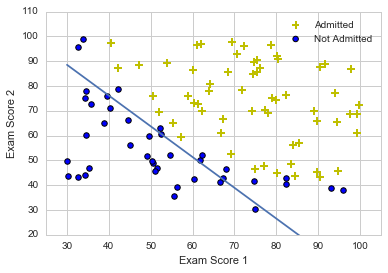

In [53]:
# get the separating hyperplane
a = plt.scatter(dataset[pos]['exam score 1'],dataset[pos]['exam score 2'], marker = '+', c = 'y', linewidth = 2, s=60, label='Admitted')
b = plt.scatter(dataset[neg]['exam score 1'],dataset[neg]['exam score 2'], c = 'b', linewidth = 1, s=30, label = 'Not Admitted')
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
plt.legend()
plt.xlim(25,105)
plt.ylim(20,110)



w = regr.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 100)
yy = a * xx - (regr.intercept_[0]) / w[1]
plt.plot(xx, yy)

In [52]:
# How well did it do?
w = regr.coef_[0]
a = -w[0] #/ w[1]
print regr.coef_
print w
print w[0]
print w[1]


[[ 0.03844482  0.03101855]]
[ 0.03844482  0.03101855]
0.0384448155549
0.0310185455629
